In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#defining data directory
base_data_dir = os.path.join("..", "Data")

# we have train , test and data also so the paths for them
train_dir = os.path.join(base_data_dir, "train")
valid_dir = os.path.join(base_data_dir, "valid")
test_dir = os.path.join(base_data_dir, "test")

#annotations for the data
train_csv = os.path.join(train_dir, "_annotations.csv")
valid_csv = os.path.join(valid_dir, "_annotations.csv")
test_csv = os.path.join(test_dir, "_annotations.csv")


In [3]:
train_df = pd.read_csv(train_csv)
train_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,rgb_7473_png.rf.bed13f9e79952f7f2b14464a185d37...,640,640,pasta_lasagne_barilla,86,88,251,234
1,rgb_7473_png.rf.bed13f9e79952f7f2b14464a185d37...,640,640,craft_yarn_caron_01,282,154,384,368
2,rgb_7473_png.rf.bed13f9e79952f7f2b14464a185d37...,640,640,pasta_lasagne_barilla,472,255,598,557
3,rgb_7473_png.rf.bed13f9e79952f7f2b14464a185d37...,640,640,lotion_essentially_nivea,84,450,200,564
4,rgb_7473_png.rf.bed13f9e79952f7f2b14464a185d37...,640,640,pasta_lasagne_barilla,399,625,568,640
...,...,...,...,...,...,...,...,...
56522,rgb_14771_png.rf.111c4d2d1cac70331fc2e75d148b6...,640,640,lotion_essentially_nivea,230,151,316,394
56523,rgb_14771_png.rf.111c4d2d1cac70331fc2e75d148b6...,640,640,cereal_cheerios_honeynut,37,179,207,466
56524,rgb_14771_png.rf.111c4d2d1cac70331fc2e75d148b6...,640,640,snack_granolabar_naturevalley,400,365,491,595
56525,rgb_14771_png.rf.111c4d2d1cac70331fc2e75d148b6...,640,640,snack_granolabar_naturevalley,449,628,484,640


In [4]:
# Directory containing images

image_files = set(os.listdir(train_dir))


csv_files = set(train_df['filename'])  

missing_files = csv_files - image_files

print(f"Number of missing image files: {len(missing_files)}")
if missing_files:
    print("Missing files:", missing_files)
else:
    print("No missing image files.")

Number of missing image files: 0
No missing image files.


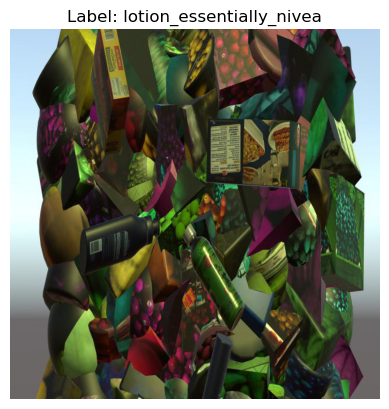

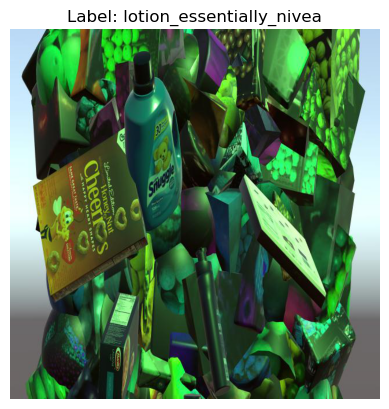

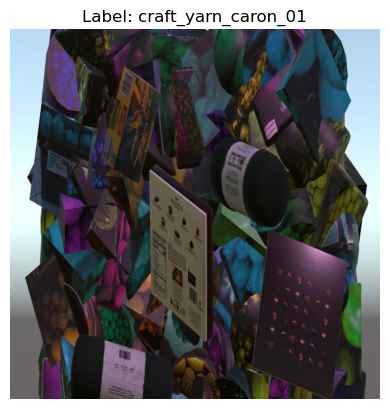

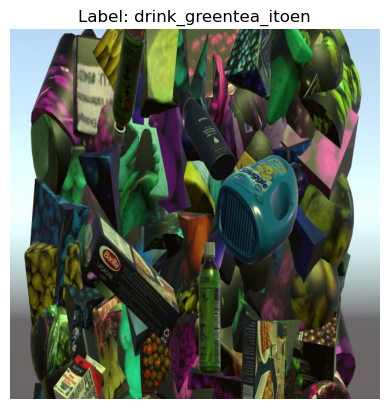

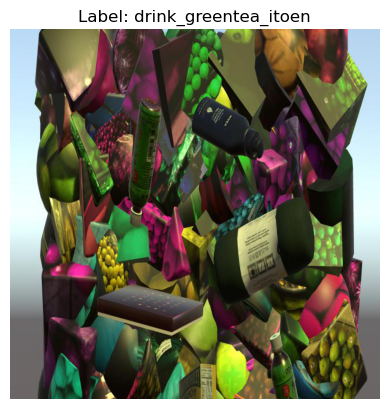

In [5]:
# viewing a few sample images with their labels
sample = train_df.sample(5)
for idx, row in sample.iterrows():
    img_path = os.path.join(train_dir, row['filename'])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Label: {row['class']}")  
    plt.axis('off')
    plt.show()

In [6]:
print(train_df.isnull().sum())

filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64


In [8]:
train_df['class'].value_counts()

class
cereal_cheerios_honeynut         5997
snack_biscotti_ghiott_01         5903
cleaning_snuggle_henkel          5751
craft_yarn_caron_01              5734
candy_minipralines_lindt         5678
pasta_lasagne_barilla            5604
lotion_essentially_nivea         5595
snack_granolabar_naturevalley    5553
drink_greentea_itoen             5481
drink_whippingcream_lucerne      5231
Name: count, dtype: int64

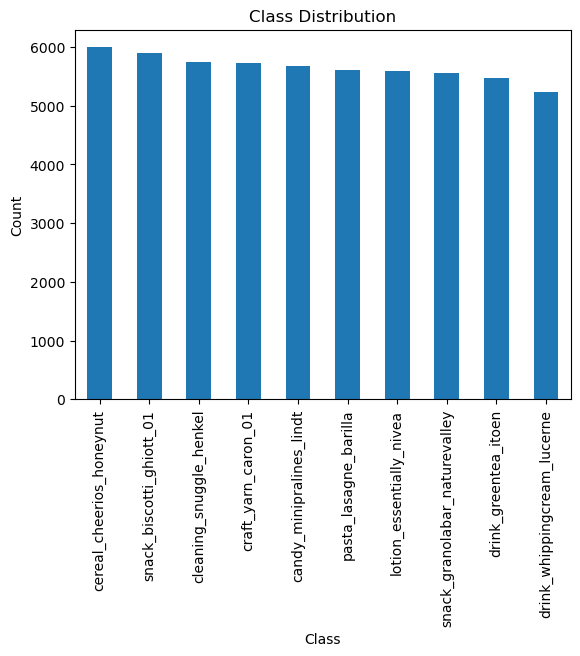

In [7]:
train_df['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

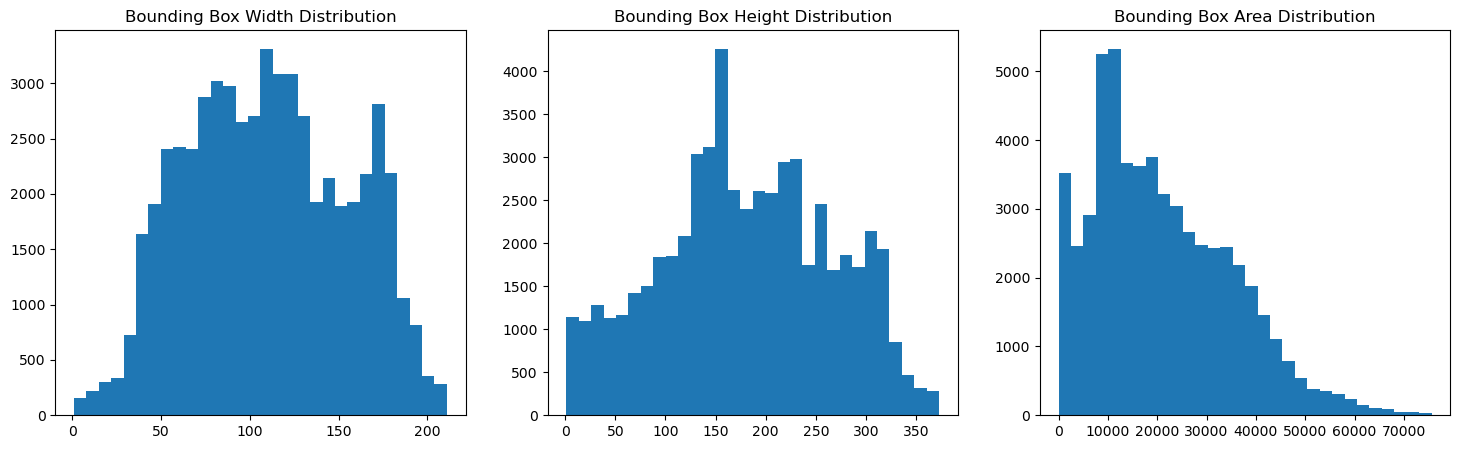

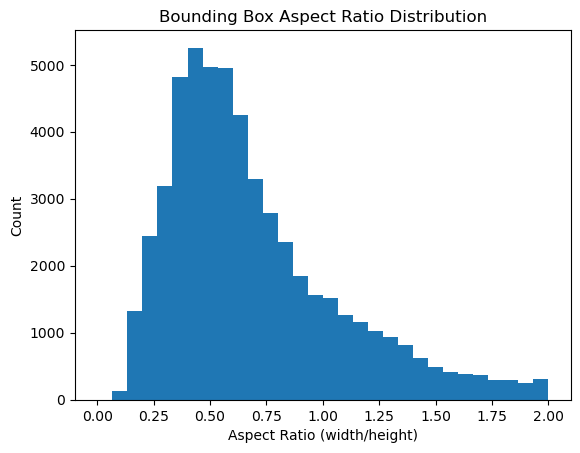

In [11]:
# Calculate bounding box width, height, and area
train_df['bbox_width'] = train_df['xmax'] - train_df['xmin']
train_df['bbox_height'] = train_df['ymax'] - train_df['ymin']
train_df['bbox_area'] = train_df['bbox_width'] * train_df['bbox_height']

# Plot distributions
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].hist(train_df['bbox_width'], bins=30)
axs[0].set_title('Bounding Box Width Distribution')
axs[1].hist(train_df['bbox_height'], bins=30)
axs[1].set_title('Bounding Box Height Distribution')
axs[2].hist(train_df['bbox_area'], bins=30)
axs[2].set_title('Bounding Box Area Distribution')
plt.show()

# Aspect ratio
train_df['aspect_ratio'] = train_df['bbox_width'] / train_df['bbox_height']
plt.hist(train_df['aspect_ratio'], bins=30 , range=(0, 2))
plt.title('Bounding Box Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (width/height)')
plt.ylabel('Count')
plt.show()

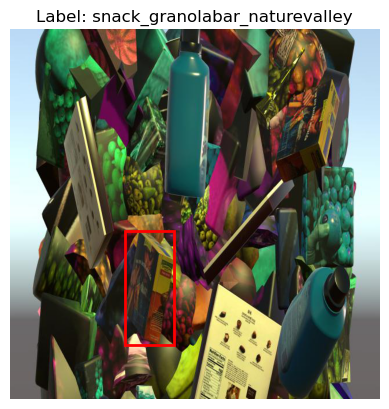

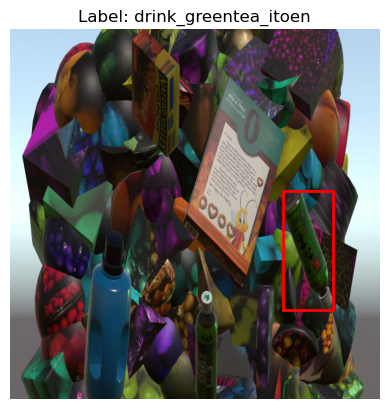

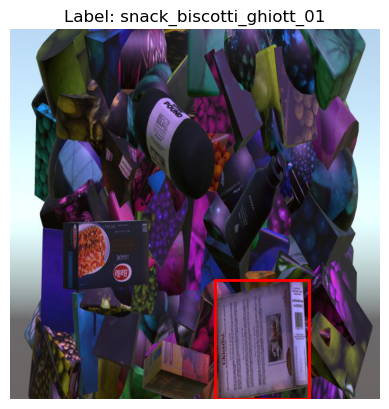

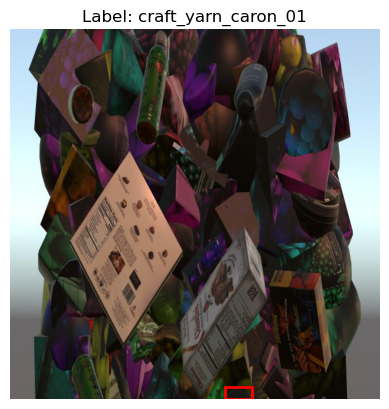

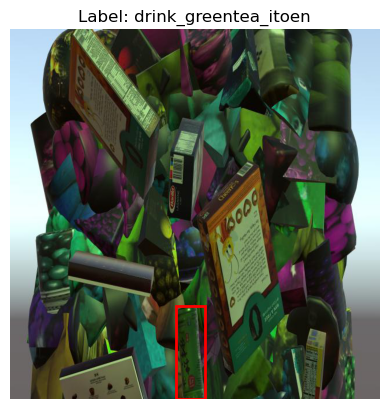

In [12]:
# Visualize bounding boxes for a few random samples
sample = train_df.sample(5)
for idx, row in sample.iterrows():
    img_path = os.path.join(train_dir, row['filename'])
    img = Image.open(img_path)
    plt.imshow(img)
    ax = plt.gca()
    rect = plt.Rectangle(
        (row['xmin'], row['ymin']),
        row['bbox_width'],
        row['bbox_height'],
        fill=False, color='red', linewidth=2
    )
    ax.add_patch(rect)
    plt.title(f"Label: {row['class']}")
    plt.axis('off')
    plt.show()

In [13]:
size_mismatches = []
for idx, row in train_df.iterrows():
    img_path = os.path.join(train_dir, row['filename'])
    img = Image.open(img_path)
    if img.width != row['width'] or img.height != row['height']:
        size_mismatches.append(row['filename'])

print(f"Number of images with size mismatches: {len(size_mismatches)}")
if size_mismatches:
    print("Files with mismatches:", size_mismatches)
else:
    print("All image sizes match the annotations.")

Number of images with size mismatches: 0
All image sizes match the annotations.
